(1036, 1314, 4)


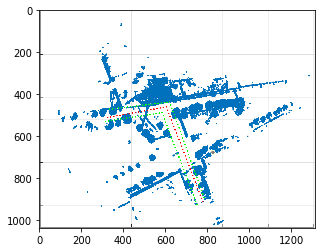

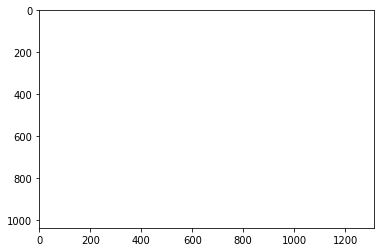

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
import matplotlib.image as mpimg 

# #open map image and resize to size of carpark
# image = Image.open('Map.png')
# # Read Images  
# new_image = image.resize((300, 200))
# new_image.save('Map_resize.png')
# plt.imshow(new_image)
img = mpimg.imread('Map.png')
print(img.shape)
new_image = plt.imshow(img)
plt.show()
#load in MPC generated data for X, Y, velocity and heading at each point
opened_file = open('Z.csv')
from csv import reader
read_file = reader(opened_file)
Z = list(read_file)
n=len(Z)
z_list = [list(map(float,i)) for i in Z]
z_list=np.array(z_list)

i=1    
    
def plotting_func(z0):
    #returns the next x,y coordinates of the car
    # Parameters of car
    
    lf = 1.738
    lr = 1.738
    width = 2
    # Assume the length of the wheel is 0.5
    lw = 0.5
    #figure
    # front
    x_f = z0[0]+lf*np.cos(z0[3])
    y_f = z0[1]+lf*np.sin(z0[3])
    # front left
    x_f_l = x_f-(width/2)*np.sin(z0[3])
    y_f_l = y_f+(width/2)*np.cos(z0[3])
    # front right
    x_f_r = x_f+(width/2)*np.sin(z0[3])
    y_f_r = y_f-(width/2)*np.cos(z0[3])
    # rear
    x_r = z0[0]-lr*np.cos(z0[3])
    y_r = z0[1]-lr*np.sin(z0[3])
    # rear left
    x_r_l = x_r-(width/2)*np.sin(z0[3])
    y_r_l = y_r+(width/2)*np.cos(z0[3])
    # rear right
    x_r_r = x_r+(width/2)*np.sin(z0[3])
    y_r_r = y_r-(width/2)*np.cos(z0[3])
    
    x_d1=[x_f_l,x_f_r]
    x_d2=[x_f_l,x_r_l]
    x_d3=[x_r_l,x_r_r]
    x_d4=[x_f_r,x_r_r]
    y_d1=[y_f_l,y_f_r]
    y_d2=[y_f_l,y_r_l]
    y_d3=[y_r_l,y_r_r]
    y_d4=[y_f_r,y_r_r]
    
    
    # draw the car

  
     #h1=axtr.plot([x_f_l,x_f_r],[y_f_l,y_f_r],'b-')
#     h2=axtr.plot([x_f_l,x_r_l],[y_f_l,y_r_l],'b-')
#     h3=axtr.plot([x_r_l,x_r_r],[y_r_l,y_r_r],'b-')
#     h4=axtr.plot([x_f_r,x_r_r],[y_f_r,y_r_r],'b-')
#     time.sleep(1)
#     # calculate the wheel
#     # left wheel
#     w_f_l_x = x_f_l+(lw/2)*np.cos(z0[3]-u[1])
#     w_r_l_x = x_f_l-(lw/2)*np.cos(z0[3]-u[1])
#     w_f_l_y = y_f_l+(lw/2)*np.sin(z0[3]-u[1])
#     w_r_l_y = y_f_l-(lw/2)*np.sin(z0[3]-u[1])
#     # right wheel
#     w_f_r_x = x_f_r+(lw/2)*np.cos(z0[3]-u[1])
#     w_r_r_x = x_f_r-(lw/2)*np.cos(z0[3]-u[1])
#     w_f_r_y = y_f_r+(lw/2)*np.sin(z0[3]-u[1])
#     w_r_r_y = y_f_r-(lw/2)*np.sin(z0[3]-u[1])

#     # Draw the wheel
#     h5=plt.plot([w_f_l_x,w_r_l_x],[w_f_l_y,w_r_l_y],'r-')  
#     h6=plt.plot([w_f_r_x,w_r_r_x],[w_f_r_y,w_r_r_y],'r-') 
    #pause(1)
    
    #plt.plot(z_list[0,:], z_list[1,:],'r-')
    obj=np.array([x_d1,x_d2,x_d3,x_d4,y_d1,y_d2,y_d3,y_d4])
    return obj


fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'r-')

def init():
    ax.set_xlim(0, 1314)
    ax.set_ylim(1036, 0)
    return ln,

def update(frames):
    z0=np.array([z_list[frames,0],z_list[frames,1], z_list[frames,2], z_list[frames,3]])
    obj=plotting_func(z0)
    xdata.append([obj[3]])
    ydata.append(obj[3:])
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0,10,10),
                    init_func=init, blit=True)
plt.show()